<a href="https://colab.research.google.com/github/Elispreng/Project-1-Food-Sales-and-Store-Cultures/blob/main/Spreng_Core_Project1_part_4_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download the data

In [2]:
#load the data
import pandas as pd
from google.colab import drive


In [3]:
filename='/content/drive/MyDrive/#3 Exploratory Viz/sales_predictions - sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Part 2


In [4]:
# Data Cleaning
#There are 12 rows and 12 columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#check for duplicates
df.duplicated
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [6]:
# drop duplicated data
df[df.duplicated(keep = False)]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
#identify missing data
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
##display rows with na values
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [10]:
#decide on missing values and how to address them
# there is missing data in "Item_weight" and will drop these rows
df.dropna(inplace = True)



In [11]:
#check for missing data
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#check the syntax and spelling errors
df['Item_Type'].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [13]:
#find the min, max, and mean of any numerical columns: Item_MRP and Outlet Sales
df['Item_MRP'].describe
df["Item_MRP"].min
df["Item_MRP"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       249.8092
1        48.2692
2       141.6180
4        53.8614
5        51.4008
          ...   
8517    178.8318
8518    214.5218
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 4650, dtype: float64>

In [14]:
df["Item_MRP"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       249.8092
1        48.2692
2       141.6180
4        53.8614
5        51.4008
          ...   
8517    178.8318
8518    214.5218
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 4650, dtype: float64>

In [15]:
df['Item_Outlet_Sales'].describe

<bound method NDFrame.describe of 0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64>

# PART 3

In [16]:
# create historgrams for various features


In [17]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
4     53.8614
5     51.4008
Name: Item_MRP, dtype: float64

In [19]:
df['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
4     994.7052
5     556.6088
Name: Item_Outlet_Sales, dtype: float64

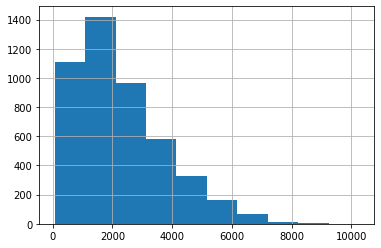

In [20]:
df['Item_Outlet_Sales'].hist();

In this histogram, outlet sales skew to the left with most of the sales between the 2,000 and 5,000 range. 

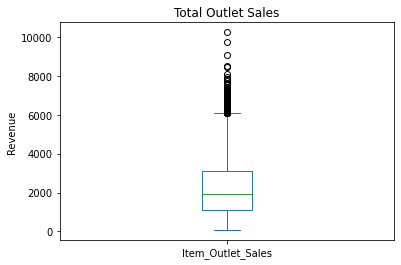

In [21]:
#create a boxplot of sales
df['Item_Outlet_Sales'].plot(kind='box')
plt.title('Total Outlet Sales')
plt.ylabel('Revenue')
plt.show()

In this boxplotthe revenue of outlet sales is in the 1500 to 3500 range for the IQR. This barplot has a strong positive skew and the median is at 2,000. 

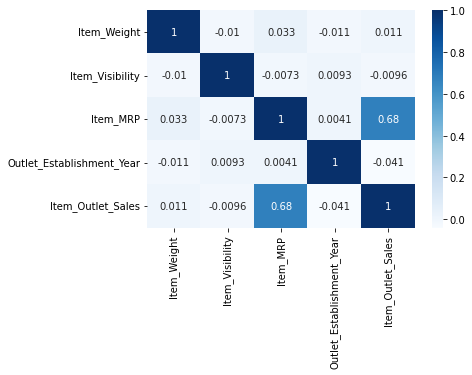

In [22]:
# create a heatmap
corr =df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

In this heatmap there is moderate correlation between Item outlet sales and Item MRP. Another moderate correlation is between Outlet Establishment Year and Item MRP. There is a low negtive correlation beween Item Outlet Sales and Outet establishment year. 

# Part 4

### Possible questions to answer
1. What establishment years have the greatest outlet sales?
2. What is the relationship between MRP and establishment years?
3. What is the trend for outlet sales for the last 3 years?
4. What is the trend for item outlet sales for the last 3 years?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


1. What establishment years have the greatest outlet  sales?

In [24]:
Year_Item_Sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
Year_Item_Sales

Outlet_Establishment_Year
1987    2298.995256
1997    2277.844267
1999    2348.354635
2004    2438.841866
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

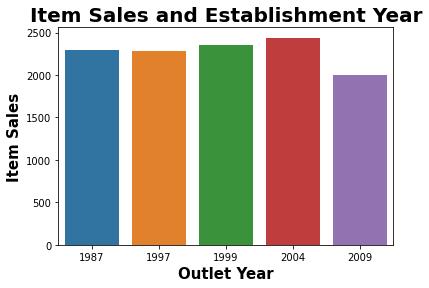

In [25]:
#fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Establishment_Year', y = 'Item_Outlet_Sales', order = Year_Item_Sales.index, ci = None)
ax.set_title('Item Sales and Establishment Year', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Sales', fontsize = 15, fontweight = 'bold');

From this barplot, the year 2004 has the highest amount of Item Outlet Sales. In contrast, the year 2009 has the lowest item sales.   

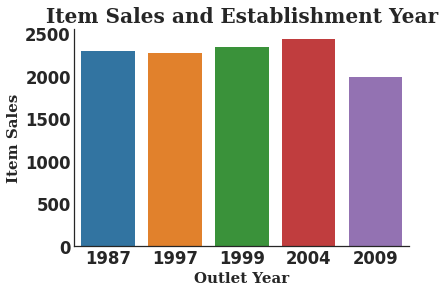

In [41]:
#create a functionalized plot
#create a decimal place of 2 values
#Year_Item_Sales_mean = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

#reset the money to rupees
#ax.axvline(Year_Item_Sales_mean, )╣  ╣
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.barplot(data=df,x='Outlet_Establishment_Year', y = 'Item_Outlet_Sales', order = Year_Item_Sales.index, ci = None)
ax.set_title('Item Sales and Establishment Year', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Year', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Sales', fontfamily ='serif', fontsize = 15, fontweight = 'bold');
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

#Format the sales in rupee
#ax.yaxis.set_major_formatter('₹{x:1.2f}')

#save current params
default_params = plt.rcParams.copy()

#update params
plt.rcParams.update ({'font.family': 'serif', 'font.size':'15', 'font.weight':'bold'})

What is the years have the hightest MRP?

In [27]:
MRP_Year = df.groupby('Outlet_Establishment_Year')['Item_MRP'].mean().sort_values(ascending=False)
MRP_Year

Outlet_Establishment_Year
2004    143.122481
1997    142.057387
2009    141.678634
1987    141.425982
1999    140.297699
Name: Item_MRP, dtype: float64

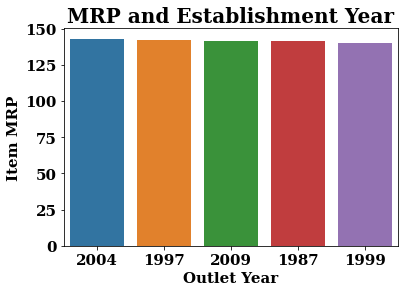

In [28]:
#fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Establishment_Year', y = 'Item_MRP', order = MRP_Year.index, ci = None)
ax.set_title('MRP and Establishment Year', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item MRP', fontsize = 15, fontweight = 'bold');

In this barplot, the year 2004 has the highest MRP. In contrast 1999, has the lowest MRP.